# LDA Topic Modeling For Non-Rural Tweets

### LDA Topic Modeling For Rural Tweets can be done just by changing the csv file below

In [8]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

stopwords = stopwords.words('english')
# cache_english_stopwords=stopwords.words('english')
newStopWords = ['NEWLINE','newline','cleantext','utm']
stopwords.extend(newStopWords)



def tweet_clean(tweet):
    # Remove tickers
    sent_no_tickers=re.sub(r'\$\w*','',tweet)
#     print('No tickers:')
#     print(sent_no_tickers)
    tw_tknzr=TweetTokenizer(strip_handles=True, reduce_len=True)
    temp_tw_list = tw_tknzr.tokenize(sent_no_tickers)
#     print('Temp_list:')
#     print(temp_tw_list)
    # Remove stopwords
    list_no_stopwords=[i for i in temp_tw_list if i.lower() not in stopwords]
#     print('No Stopwords:')
#     print(list_no_stopwords)
    # Remove hyperlinks
    list_no_hyperlinks=[re.sub(r'https?:\/\/.*\/\w*','',i) for i in list_no_stopwords]
#     print('No hyperlinks:')
#     print(list_no_hyperlinks)
    # Remove hashtags
    list_no_hashtags=[re.sub(r'#', '', i) for i in list_no_hyperlinks]
    
    ls1=[re.sub(r'�', '', i) for i in list_no_hashtags]
    
    ls2=[re.sub(r'^[0-9\.]*$', '', i) for i in ls1]


    
#     print('No hashtags:')
#     print(list_no_hashtags)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    list_no_punctuation=[re.sub(r'['+string.punctuation+']+', ' ', i) for i in ls2]
#     print('No punctuation:')
#     print(list_no_punctuation)
    # Remove multiple whitespace
    new_sent = ' '.join(list_no_punctuation)
    # Remove any words with 2 or fewer letters
    filtered_list = tw_tknzr.tokenize(new_sent)
    list_filtered = [re.sub(r'^\w\w?$', '', i) for i in filtered_list]
#     print('Clean list of words:')
#     print(list_filtered)
    filtered_sent =' '.join(list_filtered)
    clean_sent=re.sub(r'\s\s+', ' ', filtered_sent)
    #Remove any whitespace at the front of the sentence
    clean_sent=clean_sent.lstrip(' ')
#     print('Clean sentence:')
#     print(clean_sent)
    return clean_sent

f = open ('tnonlow.csv', 'r', encoding="ascii", errors='replace')
# # for k,v in get_wf (f).items():
# #     print (k)

sentences =[tweet_clean(s) for s in f]

import re

stopwords = {'NEWLINE','newline'}

a = []
for s in sentences:
    resultwords  = [word for word in re.split("\W+",s) if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    a.append(result)
# print (sentences)

# import csv

# with open('tl.csv', mode='w') as tl:
#     tl_writer = csv.writer(tl, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

#     tl_writer.writerow([a])


<input>:72: DeprecationWarning: invalid escape sequence \W
<input>:72: DeprecationWarning: invalid escape sequence \W
<input>:72: DeprecationWarning: invalid escape sequence \W
<ipython-input-8-585e910be412>:72: DeprecationWarning: invalid escape sequence \W
  resultwords  = [word for word in re.split("\W+",s) if word.lower() not in stopwords]


In [9]:
print (a [:10])

['', 'HurricaneFlorence relief Trump status', 'Anybody Houston suffering little PTSD flashbacks Harvey right HurricaneFlorence', 'latest Diario World Vision LAC edition 95e80800 b831 11e8 842a 0cc47a0d1609 Thanks hurricaneflorence haiyan', 'need act right take daughter see PawPatrol weekend Florence get right HurricaneFlorence', 'via EpiscopalRelief CDCemergency path HurricaneFlorence ALWAYS follow directions local authorities NEVER ignore evacuation order Hurricanes affect people living coast cause flooding power outages', 'Stay safe strong EYE HurricaneFlorence', 'climate law could cause catastrophic deforestation theguardian com environment sep climate law could cause catastrophic deforestation CMP share btn GCAS HurricaneFlorence biomass', 'bold think magically safe Get safe shelter unsure home withstand damage HurricaneFlorence', 'good tips prepping electronic devices advance HurricaneFlorence consumerreports org emergency prep aredness how prepare your electronic devices for natu

## Sentiment Analysis

In [10]:
# import pandas as pd
# f=pd.read_csv("tweets_low_income.csv")
# keep_col = ['cleantext']
# new_f = f[keep_col]
# new_f.to_csv("tlow.csv", index=False)

# g=pd.read_csv("tweets_non_low_income.csv")
# keep_col1 = ['cleantext']
# new_g = g[keep_col1]
# new_g.to_csv("tnonlow.csv", index=False)



In [11]:
# import nltk
# # from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyser = SentimentIntensityAnalyzer()

# def print_sentiment_scores(sentence):
#     snt = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(snt)))
# for sentence in sentences:
#     print_sentiment_scores (sentence)


# LDA 

# Load the packages
The core package used is scikit-learn (sklearn). Regular expressions re, gensim and spacy are used to process texts. pyLDAvis and matplotlib for visualization and numpy and pandas for manipulating and viewing data in tabular format.


In [12]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline


# Tokenize and Clean-up using gensim’s simple_preprocess()


In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(a))

print(data_words[:5])


[[], ['relief', 'trump', 'status'], ['anybody', 'houston', 'suffering', 'little', 'ptsd', 'flashbacks', 'harvey', 'right'], ['latest', 'diario', 'world', 'vision', 'lac', 'edition', 'cc', 'thanks', 'haiyan'], ['need', 'act', 'right', 'take', 'daughter', 'see', 'pawpatrol', 'weekend', 'florence', 'get', 'right']]


# Lemmatization

##### TIME CONSUMING


In [14]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])


['', 'relief trump status']


# Create the Document-Word matrix


In [15]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

# Check the Sparsicity


In [16]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")


# Build LDA model with sklearn

###### TIME CONSUMING


In [17]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_topics=30,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                   
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes


# Diagnose model performance with perplexity and log-likelihood


In [18]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
print(lda_model.get_params())




# How to GridSearch the best LDA model?

###### TIME CONSUMING

In [19]:
# Define Search Param
search_params = {'n_components': [5 ,10,15,20,25], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)


/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 

/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [5, 10, 15, 20, 25], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Compare LDA Model Performance Scores


In [20]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -3040556.7561088563
Model Perplexity:  1496.403047720928


# Graphical representation

/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


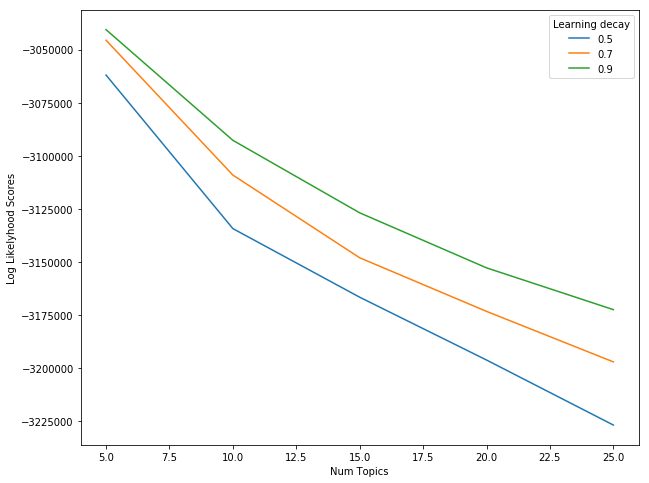

In [21]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [5,10,15,20,25]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(10,8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
# plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


# The dominant topic in each document


In [22]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# print(best_lda_model.n_topics)

# column names
# topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

topicnames = ["Topic" + str(i) for i in range(0,5)]

# index names
docnames = ["Doc" + str(i) for i in range(len(a))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics




,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.2,0.2,0.2,0.2,0.2,0
Doc1,0.05,0.8,0.05,0.05,0.05,1
Doc2,0.02,0.91,0.02,0.02,0.02,1
Doc3,0.03,0.03,0.22,0.68,0.03,3
Doc4,0.03,0.03,0.17,0.14,0.63,4
Doc5,0.01,0.01,0.24,0.01,0.72,4
Doc6,0.04,0.04,0.04,0.84,0.04,3
Doc7,0.83,0.12,0.01,0.01,0.01,0
Doc8,0.02,0.56,0.02,0.37,0.02,1
Doc9,0.01,0.01,0.95,0.01,0.01,2


In [23]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution


,Topic Num,Num Documents
0,2,36477
1,4,26646
2,1,25984
3,0,25735
4,3,23071


In [24]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(panel, 'ldaN.html')

panel


/home/maria/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      -67.499397   39.118305       1        1  25.916270
4     -128.662613 -107.394463       2        1  20.066172
1      134.103897  -32.933334       3        1  18.963926
0       70.095490  118.329918       4        1  17.982342
3       29.485537 -151.743744       5        1  17.071290, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
2722  Default  32291.000000   florence  32291.000000  30.0000  30.0000
3478  Default  31395.000000  hurricane  31395.000000  29.0000  29.0000
6151  Default   8684.000000       safe   8684.000000  28.0000  28.0000
7555  Default   8564.000000        utm   8564.000000  27.0000  27.0000
6387  Default   7596.000000      share   7596.000000  26.0000  26.0000
6738  Default   6761.000000       stay   6761.000000  25.0000  25.0000
1043  Default  14549.000000   carolina  14549.000000  24.0000  24.0000
6598  Default   7121.000000     source   7121.000000  23.0000  23.0000
7386  Default   7120.000000    twitter   7120.000000  22.0000  22.0000
1387  Default  19267.000000        com  19267.000000  21.0000  21.0000
4842  Default   7945.000000       news   7945.000000  20.0000  20.0000
3715  Default   6190.000000  instagram   6190.000000  19.0000  19.0000
7336  Default   4443.000000      trump   4443.000000  18.0000  18.0000
4921  Default   6717.000000      north   6717.000000  17.0000  17.0000
6787  Default  12625.000000      storm  12625.000000  16.0000  16.0000
4335  Default   6254.000000       make   6254.000000  15.0000  15.0000
2403  Default   3515.000000   evacuate   3515.000000  14.0000  14.0000
4246  Default   3647.000000       look   3647.000000  13.0000  13.0000
1342  Default   5903.000000      coast   5903.000000  12.0000  12.0000
7731  Default   4563.000000      water   4563.000000  11.0000  11.0000
6600  Default   3348.000000      south   3348.000000  10.0000  10.0000
7771  Default   5382.000000    weather   5382.000000   9.0000   9.0000
5515  Default   3201.000000     prayer   3201.000000   8.0000   8.0000
3587  Default   3237.000000     impact   3237.000000   7.0000   7.0000
5504  Default   3485.000000      power   3485.000000   6.0000   6.0000
6729  Default   3209.000000      state   3209.000000   5.0000   5.0000
7094  Default   4818.000000      thank   4818.000000   4.0000   4.0000
3297  Default   9252.000000       help   9252.000000   3.0000   3.0000
6217  Default   3074.000000        say   3074.000000   2.0000   2.0000
5277  Default   6805.000000     people   6805.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
5915   Topic5    563.823670     remain    564.636488   1.7663  -5.9204
703    Topic5    563.026453       blog    563.845371   1.7663  -5.9218
6356   Topic5    579.000084        set    579.867461   1.7663  -5.8938
137    Topic5    538.363897        air    539.182764   1.7663  -5.9666
6201   Topic5    535.573623   saturday    536.393123   1.7662  -5.9718
7366   Topic5    522.459599       tune    523.264411   1.7662  -5.9966
7373   Topic5   2340.253339        tus   2351.512902   1.7630  -4.4971
1607   Topic5   1547.688569   coverage   1550.212503   1.7661  -4.9106
6151   Topic5   8474.919705       safe   8684.073503   1.7434  -3.2103
4876   Topic5    884.931596      night    886.642175   1.7658  -5.4696
2850   Topic5   2216.576294     friend   2245.073926   1.7550  -4.5514
2968   Topic5    724.516561    georgia    725.664427   1.7662  -5.6696
5394   Topic5    641.198253       play    642.334124   1.7660  -5.7918
931    Topic5    972.309313   business   1007.715033   1.7320  -5.3755
5514   Topic5   2685.900366       pray   3235.226452   1.5817  -4.3594
7094   Topic5   3267.763171      thank   4818.238929   1.3795  -4.1633
2504   Topic5   2173.853540   facebook   2941.091115   1.4655  -4.5709
4

# Key-words for the topics

In [25]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()


,aaa,aan,aarp,abandon,abc,abccolumbia,abcnew,abd,ability,able,...,zello,zero,zerohedge,zip,zombie,zone,zonea,zoo,zoom,zxbzwvdrs
Topic0,28.054783,0.488585,26.010836,212.545536,0.205072,0.210233,4.975984,0.201162,0.205659,0.203399,...,0.202758,0.204296,0.202289,0.203655,0.203165,522.908203,0.210905,35.707605,0.203614,4.605825
Topic1,0.200889,0.209404,0.204924,0.201838,0.203697,0.202438,0.206001,0.201705,0.205827,0.204459,...,0.202074,0.203818,1.539557,0.201274,0.203482,0.201997,9.022874,0.202560,0.207321,0.200726
Topic2,0.207549,0.206737,0.202134,0.203102,0.209509,13.334817,0.212271,0.207204,0.207252,0.201900,...,0.310983,15.338231,27.008976,0.201150,0.202816,126.560881,0.202362,0.201612,21.525395,7.147095
Topic3,0.202470,0.200975,0.200765,0.201698,89.265725,0.204514,18.712978,29.478305,8.284211,0.206623,...,0.201097,0.258743,0.200720,5.658192,11.253527,0.204604,2.745028,0.236139,0.205118,0.200016
Topic4,0.223323,20.985056,0.201926,0.234321,148.435385,0.203115,0.205023,0.202717,42.728864,471.483899,...,73.844736,0.203039,0.203052,28.737156,12.890006,0.203652,0.202806,0.204501,0.218755,0.202355


#  Get the top 15 keywords each topic


In [26]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,florence,carolina,hurricane,north,evacuate,south,impact,state,say,pipe
Topic 1,com,utm,share,source,twitter,instagram,trump,help,status,look
Topic 2,florence,hurricane,storm,com,news,carolina,coast,weather,watch,live
Topic 3,safe,stay,make,thank,prayer,leave,pray,shelter,tus,friend
Topic 4,people,water,help,need,power,good,area,affect,rescue,know


### SOME EXTRA WORK

# the order of transformations is:

sent_to_words() –> lemmatization() –> vectorizer.transform() –> best_lda_model.transform()

In [27]:
# # Define function to predict topic for a given text document.
# nlp = spacy.load('en', disable=['parser', 'ner'])

# def predict_topic(text, nlp=nlp):
#     global sent_to_words
#     global lemmatization

#     # Step 1: Clean with simple_preprocess
#     mytext_2 = list(sent_to_words(text))

#     # Step 2: Lemmatize
#     mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#     # Step 3: Vectorize transform
#     mytext_4 = vectorizer.transform(mytext_3)

#     # Step 4: LDA Transform
#     topic_probability_scores = best_lda_model.transform(mytext_4)
#     topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
#     return topic, topic_probability_scores

# # Predict the topic
# mytext = ["What started out to be a tropical Storm moving from the atlantic is now a major Hurricane"]
# topic, prob_scores = predict_topic(text = mytext)
# print(topic)

# How to cluster documents that share similar topics and plot?

In [28]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.37  0.4   0.58  0.41  0.44]
 [-0.12 -0.45  0.79 -0.17 -0.35]]
Perc of Variance Explained: 
 [0.01 0.33]


Text(0.5,0,'Component 1')

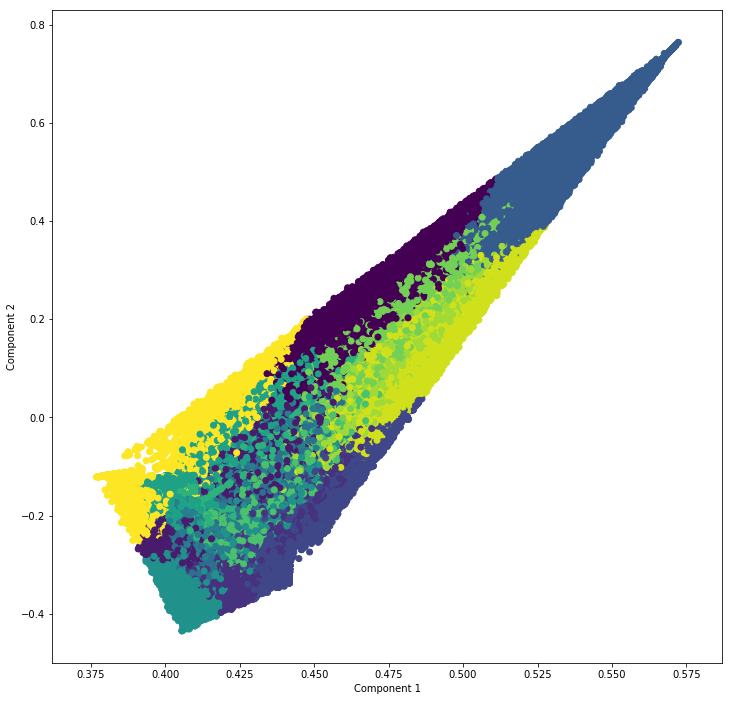

In [29]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
# plt.title("Segregation of Topic Clusters", )
